# Measuring the friendship paradox
By now you should have a working Juptyer notebook and be using Python 3 (with Anaconda). If not, then make sure you have done the [Python Setup assignment in Week 0](https://github.com/yy/netsci-course/blob/master/week0-getready/python-setup.md) (where you will also find some basic tutorials on python control statements).

To get a better intuitive understanding of the friendship paradox we are going to work through some problems and examples in this notebook. A few tasks will be left to you to complete and submit in your own notebook. Before we dive into creating our own paradox we will go over some basic commands used in the networkx library.

## Step 1: Using networkx
We are going to start by importing the networkx module:

In [1]:
import networkx as nx

By importing the module this way we can use any of the library's classes and functions by prepending the name of the class or function with: 

```
nx.
```

Networkx has extensive documention with many examples and I highly suggesting looking over the contents of the [Networkx 1.11 documentation page](http://networkx.readthedocs.io/en/networkx-1.11/) to get an idea of the kinds of things networkx can do.

We will start by making a simple undirected graph by hand:

In [2]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

We now have our first graph which contains 3 nodes and 2 edges. ```add_node()``` and ```add_edge``` are **methods** of the class ```Graph```. Methods are member functions of classes in python and can be called from an object by using the ```.``` notation followed by the method name. We can find out some basic information about this graph using networkx functions and some default python functions:

In [3]:
# Lets find out how many nodes the graph has
num_nodes = len(my_first_graph) # len()  is a python function that can be applied to most lists or sequences
print(num_nodes)

3


In [4]:
# We can also get the degree of any node in the graph
node2_degree = my_first_graph.degree(2)
print("Node 2's degree: ",node2_degree)

# Or we can get the neighbors of any node
node2_neighbors = my_first_graph.neighbors(2)
print("Node 2's neighbors: ", node2_neighbors)

Node 2's degree:  2
Node 2's neighbors:  [1, 3]


Make sure to review the documentation on both of these functions ([degree](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.Graph.degree.html?highlight=degree#networkx.Graph.degree) and [neighbors](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors)) so you are aware what additional arguments you can give. For instance, degree can take a sequence of nodes as an argument and return a sequence of corresponding degrees.

We can also combine python control statements with networkx functions:

In [5]:
# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes_iter():
    print("Node", node, "'s neighbors:", my_first_graph.neighbors(node))

Node 1 's neighbors: [2]
Node 2 's neighbors: [1, 3]
Node 3 's neighbors: [2]


I wrote a python *for* loop that iterated over the generator returned by the networkx graph method ```nodes_iter()```. This graph method returns a generator that yeilds each successive node in the network which the python *for* loop can then iterate over. [More information on python generators](https://wiki.python.org/moin/Generators). Alternatively, we could have used ```nodes()``` which is a method that returns a list instead of a generator. Similarly, we can loop over edges using ```edges_iter()``` or ```edges()``` to get a list of edges in the network.

In [6]:
# Quick example of iterating over edges
for edge in my_first_graph.edges_iter():
    print(edge)

(1, 2)
(2, 3)


Before we move on there is one more thing we would like to do which is visualize our graph. Networkx isn't known for making the prettiest graphs, we will be using [Gephi](https://gephi.org/) for that later, but it can provide us with a basic visualization to get an idea of what our graph looks like.

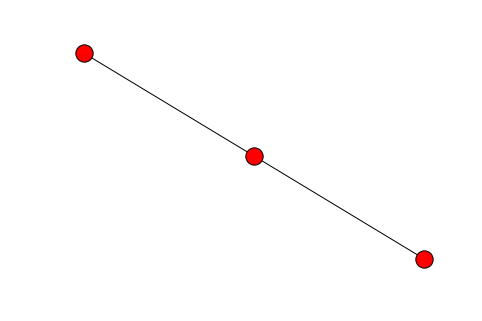

In [7]:
# Draw figures in the notebook
%matplotlib inline
# We will use matplotlib as a backend for the visualization
import matplotlib.pyplot as plt

# Next we will call networkx's draw function on our graph
nx.draw(my_first_graph)

# And then ask matplotlib to show the figure
plt.show()

## Step 2: Friendship paradox example
Now lets apply some of these tools to the friendship paradox. We will start by using networkx's graph generators to construct a graph for us, then we will calculate the average degree of the network. Once that is done we will calculate the average degree of the neighbors of a few random nodes in the network and compare those values with the degree of the nodes themselves.

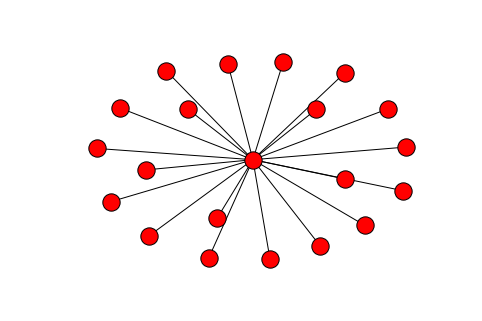

In [8]:
# Use one of networkx's graph generator functions to create a graph
star_graph = nx.star_graph(n=20)
nx.draw(star_graph)
plt.show()

In [9]:
# Lets calculate the average degree of the graph
degree_sum = 0.0
for node in star_graph.nodes_iter():
    degree_sum += star_graph.degree(node)
avg_degree = degree_sum / len(star_graph)
print("Average degree", avg_degree)

Average degree 1.9047619047619047


In [10]:
# Now lets do it in one line using numpy
import numpy as np

# Calculate the average degree of the nodes in the graph
avg_degree = np.mean([star_graph.degree(node) for node in star_graph.nodes_iter()])
print("Average degree:",avg_degree)

Average degree: 1.90476190476


To do it more succintly I used a list comprehension to fold the list construction process into one line:
```
[star_graph.degree(node) for node in star_graph.nodes_iter()]
```

This codes creates a list of the degrees of each node for each node in the star graph. Using a [list comprehension](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html) isn't always possible, but it is faster and more succint than the alternative.

To calculate the mean, I used [numpy's mean function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), which can come in handy for quickly calculating the mean of a list or sequence along an axis. So I passed the list comprehension directly to ```np.mean``` and it returned the mean of that list. 

Note: Numpy uses its own data types for carrying out calculations, so if you print a numpy float it will display differently than if you printed a python float, which is why we get the intentional truncation of the value when displayed.

For basic graph information, networkx also has the [info()](https://networkx.readthedocs.io/en/stable/reference/generated/networkx.classes.function.info.html?highlight=info)
function:

In [11]:
# Alternatively we can use use nx.info() to get the average degree
print(nx.info(star_graph))

Name: star_graph(20)
Type: Graph
Number of nodes: 21
Number of edges: 20
Average degree:   1.9048


### Q1: Average neighbor degree
Now that you have seen some examples of networkx and numpy I want you to complete the star graph example by writing a function below that calculates the average degree of a node's neighbors. See the control flow tutorial from the first assignment for how to define functions. Use the space provided below:

In [ ]:
# Replace with your code

### Q2: Viewing the friendship paradox
We would like to check whether the friendship paradox exists in this network. But it isn't necessary to view all the nodes, so we should pick a smaller random set for visualization. Numpy has many built in functions for [random numbers](http://docs.scipy.org/doc/numpy/reference/routines.random.html). Pick a suitable function and then apply your function to 4 random nodes of the network. Print out the degree of the chosen node and the average degree of its neighbors for comparison:

In [ ]:
# Replace with your code

Even though the star graph is a fairly trivial example it does display the friendship paradox. It is an extreme case where the average degree of the network is wildly different from the average degree of your neighbors. For all but one node (the center node 0) you have fewer friends than your friends.

This concludes the tutorial section of this notebook, if you have any questions about what the code does, or about python or networkx in general, don't be shy to message the instructors (or your peers) on [Slack](https://iu-netsci-online.slack.com/messages) with those questions.

## Step 3: Friendship paradox assignment

Your task is to perform a similar analysis for two other types of graphs: a scale-free graph and a random graph. You can use networkx's generator functions for making the [scale-free graph](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph) and the [random graph](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph). 

### Q3: Scale-free graph
For the barabasi-albert graph use the parameters ```n=200``` and ```m=3```. You should answer the following questions:

#### 1. What is the average degree of the graph?

#### 2. Pick a few random nodes from the network. For each node: What is the node's degree? How does it compare with the node's average neighbor degree?

#### 3. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

#### 4. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? (provide your response in the markdown cell below)

### Q4: Random graph

For the erdos-renyi graph use the parameters ```n=200``` and ```p=0.2```.

#### 1. What is the average degree of the graph?

#### 2. Pick a few random nodes from the network. For each node: What is the node's degree? How does it compare with the node's average neighbor degree?

#### 3. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

#### 4. Did the friendship paradox occur in the random graph? If so, why did it? If not, why not?

#### Lastly: rename your notebook as 'friendship_lastname_firstname' and upload to Canvas in the Friendship paradox assignment section.